In [1]:
import pandas as pd
import numpy as np

In [2]:
oo = pd.read_csv('olympics.csv', skiprows=4)
oo.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


1.На какой дистанции Jesse Owens выиграл медаль?

In [3]:
# oo[oo.Athlete.str.contains('Jesse') & oo.Athlete.str.contains('OWENS') ]
oo[(oo.Athlete=='OWENS, Jesse') & (oo.Medal=='Gold')]['Event']
#    & (oo.Athlete.str.contains('\\d+\\s*m', regex = True) does not work for some reason

6427            100m
6439            200m
6456    4x100m relay
6523       long jump
Name: Event, dtype: object

2.Какая страна выйграла большинство золотых медалей мужчинами в бадминтоне? Отсортировать результат в алфавитном порядке по имени игрока.

In [4]:
base_facts = oo[(oo.Sport=='Badminton') & (oo.Gender=='Men') & (oo.Medal=='Gold')]
base_facts
agg = base_facts.groupby(['NOC'])['Medal'].count().reset_index(name='MedalsCount')
agg



,NOC,MedalsCount
0,CHN,4
1,DEN,1
2,INA,8
3,KOR,6


In [5]:
agg["cnt_rank"] = agg['MedalsCount'].rank(ascending=False)
agg

,NOC,MedalsCount,cnt_rank
0,CHN,4,3.0
1,DEN,1,4.0
2,INA,8,1.0
3,KOR,6,2.0


In [6]:
top_countries = agg[(agg.cnt_rank )==1]
top_countries

,NOC,MedalsCount,cnt_rank
2,INA,8,1.0


In [7]:
we_are_the_champions = base_facts.merge(top_countries, on = ('NOC'))[['City', 'Edition', 'Athlete','NOC']] \
.sort_values(by=['Athlete'])
we_are_the_champions

,City,Edition,Athlete,NOC
0,Barcelona,1992,"BUDI KUSUMA, Alan",INA
3,Sydney,2000,"GUNAWAN, Tony",INA
5,Athens,2004,"HIDAYAT, Taufik",INA
6,Beijing,2008,"KIDO, Markis",INA
1,Atlanta,1996,"MAINAKY, Rexy Ronald",INA
7,Beijing,2008,"SETIAWAN, Hendra",INA
2,Atlanta,1996,"SUBAGJA, Ricky Achmad",INA
4,Sydney,2000,"WIJAYA, Candra",INA


Какие три страны выйграли большинство медалей в последние годы (с 1984 по 2008)?

In [8]:
base_facts = oo[(oo.Edition>=1984)]
agg = base_facts.groupby(['NOC']).size().sort_values(ascending=False)[0:3]
agg



NOC
USA    1837
AUS     762
GER     691
dtype: int64

Покажите мужчин золотых медалистов по 100m. Выведите результаты по убыванию года выйгрыша. Покажите город в котором проходила олимпиала, год, имя атлета и страну за которую он выступал.

In [9]:
base_facts = oo[(oo.Gender=='Men') & (oo.Medal=='Gold') & (oo.Event.str.contains('100m'))]
xx = base_facts[['City','Edition','Athlete', 'NOC']]
xx.head(100)

,City,Edition,Athlete,NOC
0,Athens,1896,"HAJOS, Alfred",HUN
3,Athens,1896,"MALOKINIS, Ioannis",GRE
13,Athens,1896,"BURKE, Thomas",USA
231,Paris,1900,"JARVIS, Francis",USA
671,St Louis,1904,"BRACK, Walter",GER
...,...,...,...,...
27552,Beijing,2008,"BOLT, Usain",JAM
27603,Beijing,2008,"BOLT, Usain",JAM
27604,Beijing,2008,"CARTER, Nesta",JAM
27605,Beijing,2008,"FRATER, Michael",JAM


Используя groupby(), постройте график число всех медалей выйгранных на каждой олимпиаде.

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

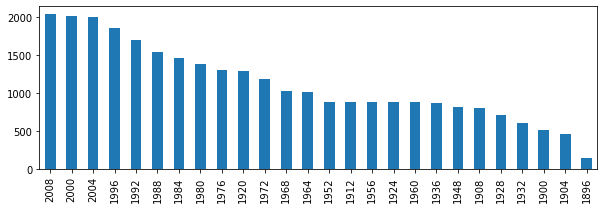

In [11]:
oo.Edition.value_counts().plot(kind='bar', figsize=(10,3));

Создайте список показывающий число всех медалей выйгранных каждой страной в течение всей истории олимпийских игр. Для каждой страны, необходимо показать год первой и последней заработанной медали.



In [24]:
agg = oo.groupby('NOC').agg(medals_cnt= ('Edition', 'size')
                            ,min_year=('Edition', 'min'), max_year=('Edition', 'max')) 
# {'Edition': ['size','min', 'max']}
agg.sort_values(by=['medals_cnt'], ascending=False)
     # (min_height=('height', 'min'),                              max_weight=('weight', 'max'))                       

,medals_cnt,min_year,max_year
NOC,,,
ZZX,48,1896,1904
ZIM,23,1980,2008
ZAM,2,1984,1996
YUG,435,1924,2000
VIE,2,2000,2008
...,...,...,...
FRG,490,1968,1988
FRA,1314,1896,2008
FIN,451,1908,2008


Постройте график числа золотых медалей выйгранных США мужчинами и женщинами в атлетике?

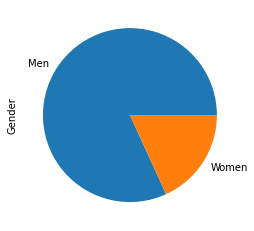

In [21]:
base_facts = oo[(oo.Sport=='Athletics') & (oo.NOC=='USA')][['Gender']]
base_facts.Gender.value_counts().plot(kind='pie')
plt.show()



Постройте график 5 атлетов которые выйграли большинство золотых медалей.


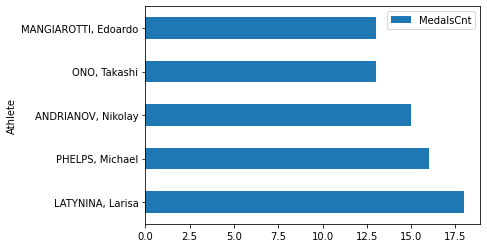

In [14]:
agg = oo.groupby('Athlete').size().sort_values(ascending=False).reset_index(name='MedalsCnt')
agg[0:5].plot(x='Athlete', y='MedalsCnt',kind='barh')
plt.show()


Постройте таблицу в которой по годам всех олимпиад покажите топовых атлетов США(1 атлет на год) по общему количеству медалей? Включите дисциплину атлета.
(DK: 
- возьмем за допущение что атлет всегда в одой дисциплине выступает
- а как обойтись без .reset_index - чтобы отобразить это не в плоской, а в иерархической форме?
 

In [15]:
agg = oo[(oo.Sport=='Athletics') & (oo.NOC=='USA')]\
.groupby(['Edition','Athlete','Discipline'])\
.size()\
.reset_index(name='MedalsCount')

tops=\
(
    agg.assign(
        rn=agg.sort_values(["MedalsCount"], ascending=False)
        .groupby(["Edition"])
        .cumcount()+1
    )
    .query("rn==1")
    .sort_values(["Edition", "rn"])
)
tops[tops.columns.difference(['rn'])] #removed un-used column rn

,Athlete,Discipline,Edition,MedalsCount
5,"GARRETT, Robert",Athletics,1896,4
10,"BAXTER, Irving",Athletics,1900,5
49,"HAHN, Archie",Athletics,1904,3
105,"SHEPPARD, Melvin",Athletics,1908,3
117,"CRAIG, Ralph",Athletics,1912,2
167,"PADDOCK, Charles",Athletics,1920,3
214,"SCHOLZ, Jackson",Athletics,1924,2
245,"ROBINSON, Elizabeth",Athletics,1928,2
259,"DIDRIKSON, Mildred",Athletics,1932,3
306,"OWENS, Jesse",Athletics,1936,4


In [16]:
# Список показывающий число всех медалей выйгранных каждой страной в течение всей истории олимпийских игр. 
# Для каждой страны, необходимо показать год первой и последней заработанной медали.

agg = oo.groupby(['NOC']).agg(
    year_min=pd.NamedAgg(column="Edition", aggfunc="min"),
    year_max=pd.NamedAgg(column="Edition", aggfunc="max"),
    cnt=pd.NamedAgg(column="Edition", aggfunc="count")
)
agg


,year_min,year_max,cnt
NOC,,,
AFG,2008,2008,1
AHO,1988,1988,1
ALG,1984,2008,14
ANZ,1908,1912,29
ARG,1924,2008,239
...,...,...,...
VIE,2000,2008,2
YUG,1924,2000,435
ZAM,1984,1996,2
